In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

In [33]:
data_frame = pd.read_excel('data.xlsx')
male_df = data_frame[data_frame['性別'] == 'm']
female_df = data_frame[data_frame['性別'] == 'f']
#概要を表示(数値データのみ)
print(data_frame.describe())
print(male_df.describe())
print(female_df.describe())

             年齢          身長         体重        最大血圧       最小血圧
count  50.00000   50.000000  50.000000   50.000000   50.00000
mean   41.30000  162.540000  60.300000  124.900000   89.40000
std    12.07164   10.194456   9.418284    9.159026   15.20741
min    23.00000  141.000000  43.000000  105.000000   65.00000
25%    32.00000  154.250000  53.250000  118.250000   80.00000
50%    42.00000  165.000000  62.500000  123.000000   85.00000
75%    49.75000  168.750000  68.000000  130.750000   95.75000
max    67.00000  185.000000  75.000000  144.000000  129.00000
              年齢          身長         体重        最大血圧        最小血圧
count  24.000000   24.000000  24.000000   24.000000   24.000000
mean   40.875000  169.958333  66.000000  126.583333   87.041667
std    11.191272    6.209944   5.602794    9.343292   13.942363
min    23.000000  159.000000  53.000000  115.000000   65.000000
25%    31.750000  166.500000  62.750000  118.000000   79.000000
50%    41.000000  168.500000  68.000000  126.000000   85.0

In [29]:
#各数値データの度数分布表を表示
def frequency_table(data:pd.Series, stur=False):
    
    data_len = len(data)

    # スタージェンスの公式でbinの数を求める
    if stur is True:
        b = round(1 + np.log2(data_len))
        hist, bins = np.histogram(data, bins=b)

    else:
        hist, bins = np.histogram(data)

    bins.round(2)
    # データフレーム作成
    df = pd.DataFrame(
        {
            '以上': bins[:-1],
            '以下': bins[1:],
            '階級値': (bins[:-1]+bins[1:])/2,
            '度数': hist
        }
    )

    # 相対度数の計算
    df['相対度数'] = df['度数'] / data_len
    # 累積度数の計算
    df['累積度数'] = np.cumsum(df['度数'])
    # 累積相対度数の計算
    df['累積相対度数'] = np.cumsum(df['相対度数'])
    return df.round(2)

    
def show_freq_table(df:pd.Series, title:str):
    freq_table = frequency_table(df)
    fig = plt.figure(figsize=(8, 5))
    fig.suptitle(title, fontsize=20)
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_label(str(df.name))
    ax1 = fig.gca()
    ax1.axis('off')
    ax1.table(cellText=freq_table.values, colLabels=list(freq_table.columns.values), loc='center', cellLoc='center')
    fig.tight_layout()



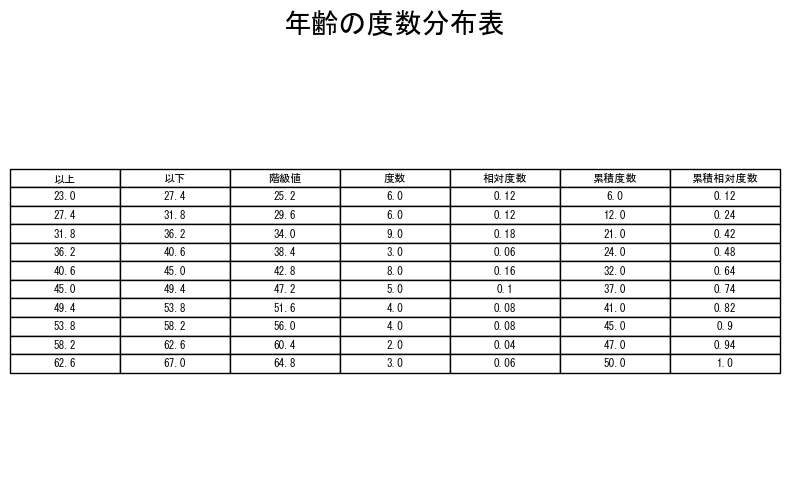

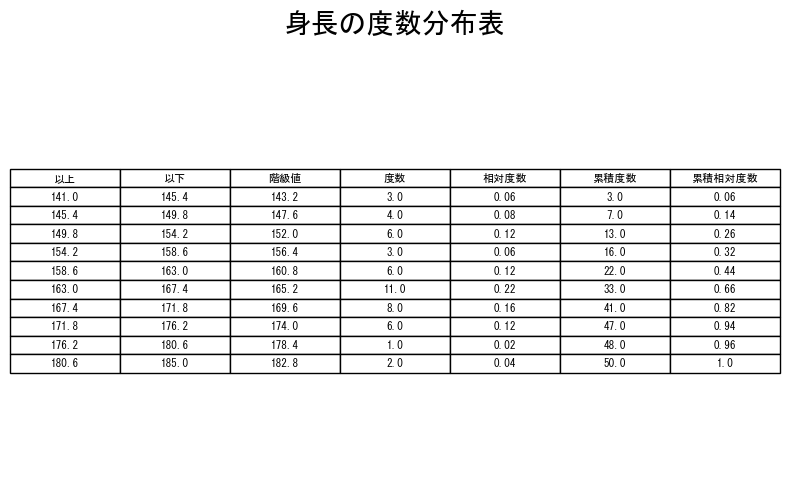

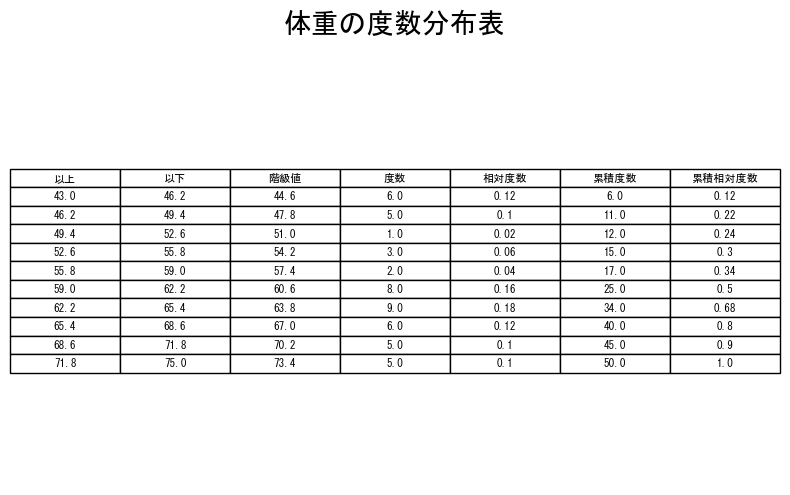

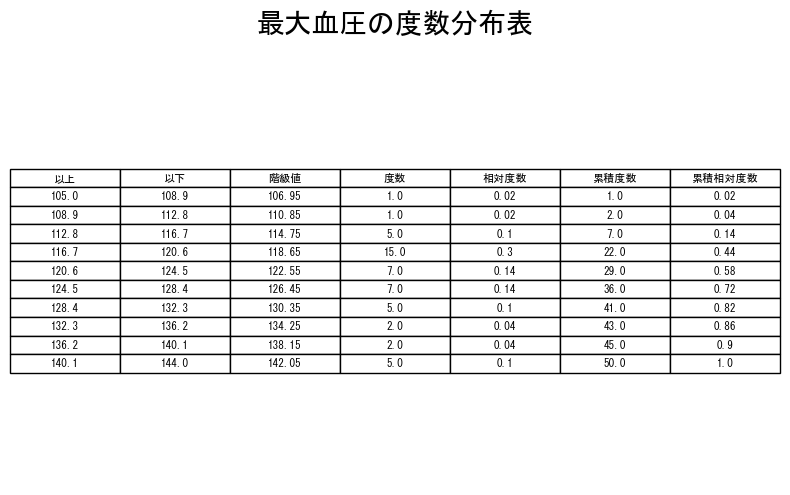

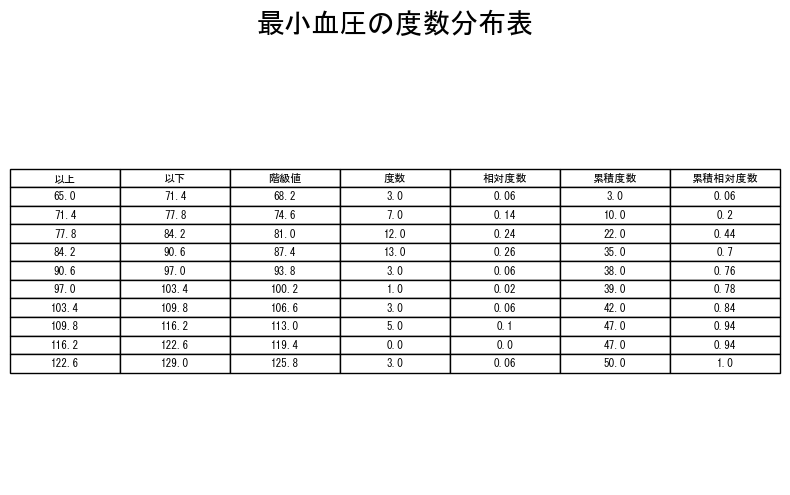

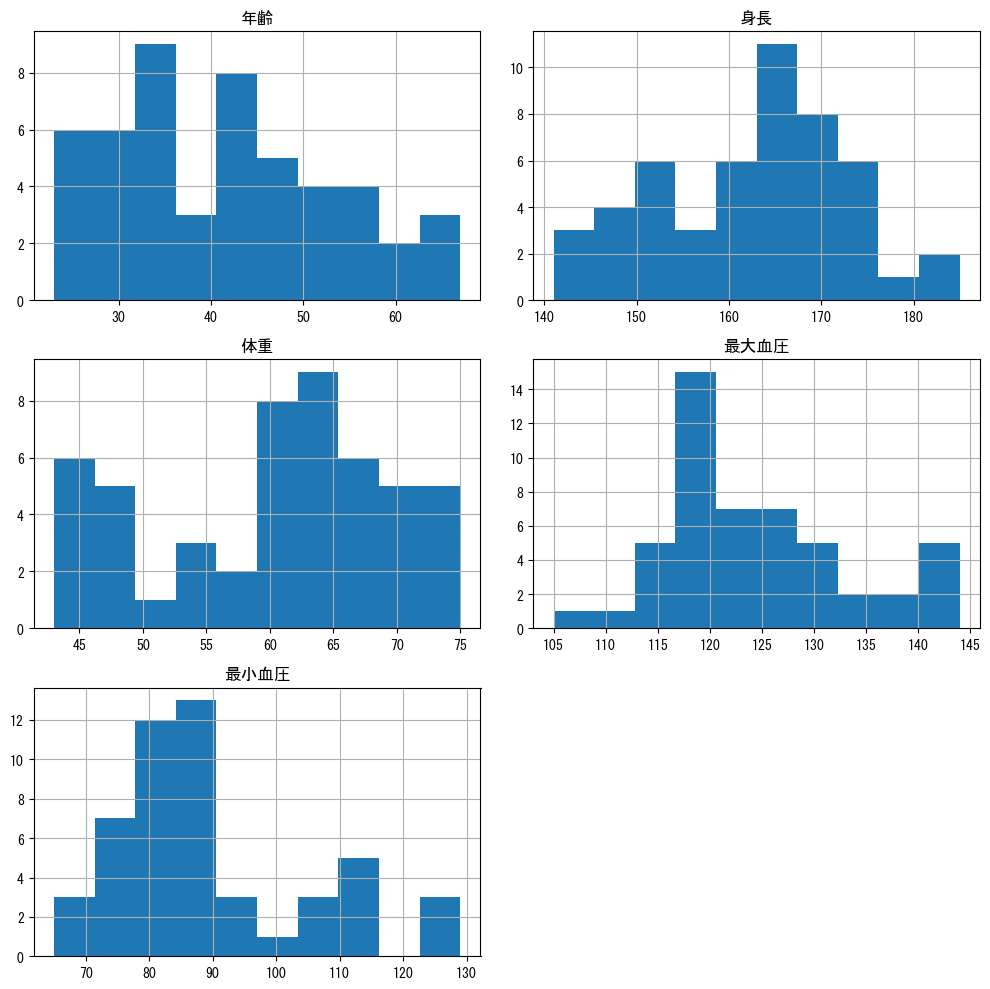

In [30]:
#各数値データのヒストグラムを表示
show_freq_table(data_frame['年齢'], '年齢の度数分布表')
show_freq_table(data_frame['身長'], '身長の度数分布表')
show_freq_table(data_frame['体重'], '体重の度数分布表')
show_freq_table(data_frame['最大血圧'], '最大血圧の度数分布表')
show_freq_table(data_frame['最小血圧'], '最小血圧の度数分布表')
data_frame.hist(figsize=(10, 10), bins=10)
plt.tight_layout()

C:\Users\syu\AppData\Local\Temp\ipykernel_17744\4128963921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df.sort_values(by='年齢', inplace=True)
C:\Users\syu\AppData\Local\Temp\ipykernel_17744\4128963921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df.sort_values(by='年齢', inplace=True)


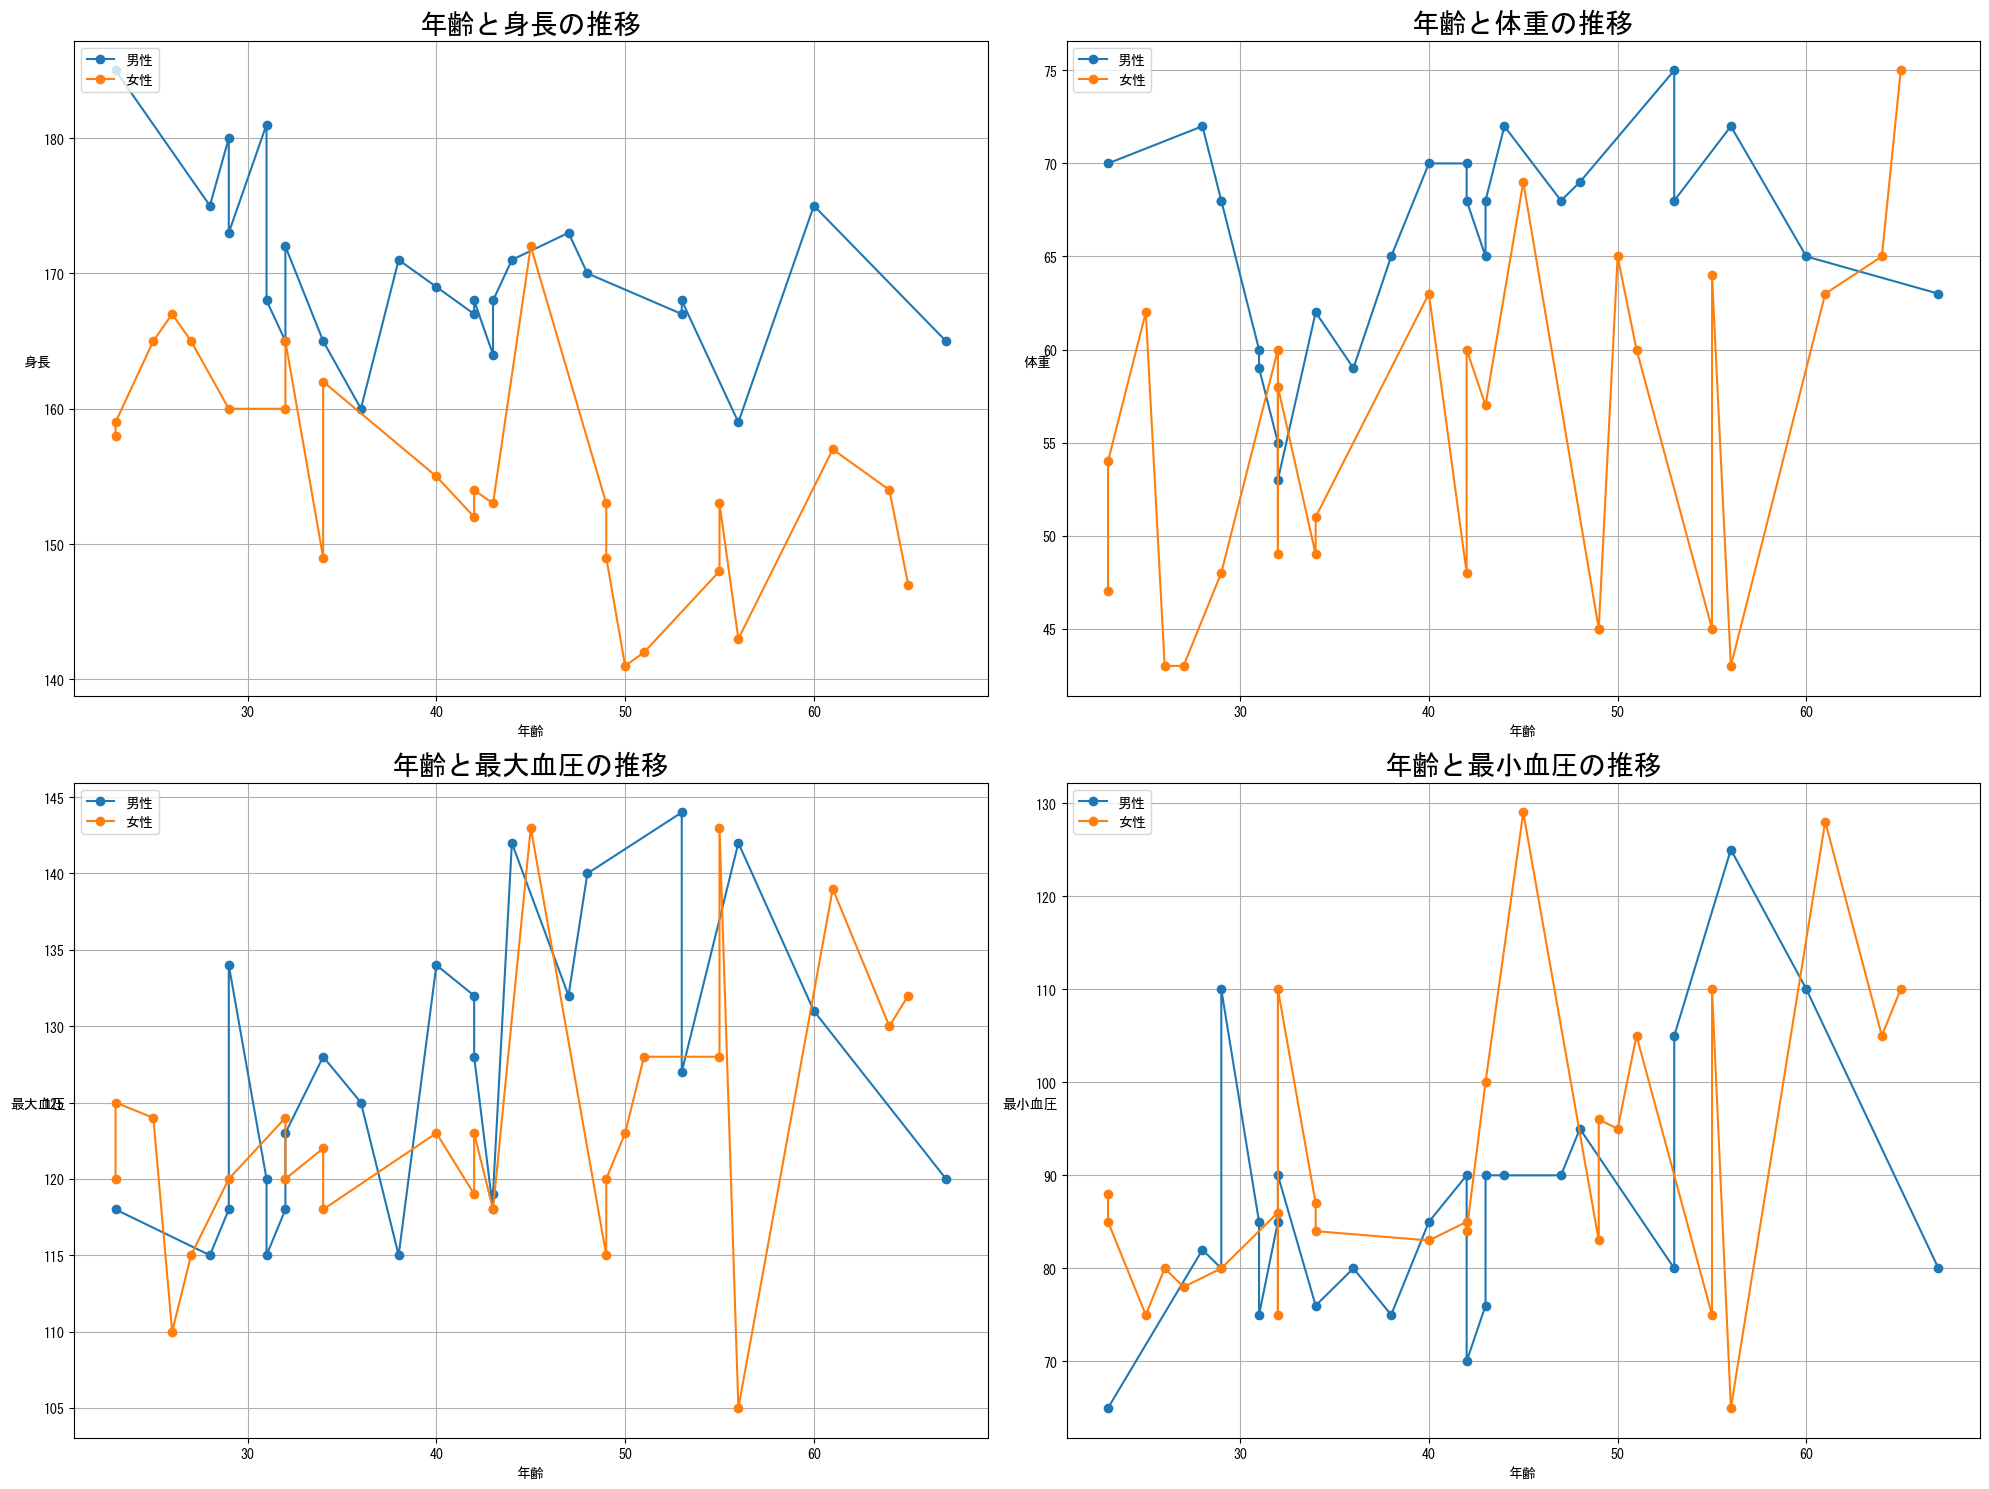

In [32]:
data_frame.sort_values(by='年齢', inplace=True)
male_df.sort_values(by='年齢', inplace=True)
female_df.sort_values(by='年齢', inplace=True)

def plot_transition_splitBy_gender(xs:list[pd.Series], ys:list[list[pd.Series]], titles:list[str], gender:list[str]):
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))
    for i, [y1, y2] in enumerate(ys):
        ax[i//2][i%2].set_title(titles[i], fontsize=20)
        ax[i//2][i%2].set_xlabel(str(xs[0].name))
        ax[i//2][i%2].set_ylabel(str(y1.name)).set_rotation(0) #type: ignore
        ax[i//2][i%2].grid()
        ax[i//2][i%2].plot(xs[0], y1, marker='o', label=gender[0])
        ax[i//2][i%2].plot(xs[1], y2, marker='o', label=gender[1])
        #ax[i//2][i%2].plot(xs[2], y3, marker='o', label=gender[2])
        ax[i//2][i%2].legend(loc='upper left')
    fig.tight_layout()


plot_transition_splitBy_gender(
    [
        male_df["年齢"],
        female_df["年齢"],
        #data_frame["年齢"],
    ],
    [
        [
            male_df["身長"],
            female_df["身長"],
            #data_frame["身長"]
        ],
        [
            male_df["体重"],
            female_df["体重"],
            #data_frame["体重"]
        ],
        [
            male_df["最大血圧"],
            female_df["最大血圧"],
            #data_frame["最大血圧"]
        ],
        [
            male_df["最小血圧"],
            female_df["最小血圧"], 
            #data_frame["最小血圧"]
        ]
    ],
    [
        "年齢と身長の推移",
        "年齢と体重の推移",
        "年齢と最大血圧の推移",
        "年齢と最小血圧の推移"
    ],
    ["男性", "女性",] #"全体"]
)


In [ ]:
#体重と身長の推移
data_frame.sort_values(by='体重', inplace=True)
male_df.sort_values(by='体重', inplace=True)
female_df.sort_values(by='体重', inplace=True)
plot_transition_splitBy_gender(
    [
        male_df["体重"],
        female_df["体重"],
    ],
    [
        [male_df["年齢"], female_df["年齢"]],
        [male_df["身長"], female_df["身長"]],
        [male_df["最大血圧"], female_df["最大血圧"]],
        [male_df["最小血圧"], female_df["最小血圧"]]
    ],
    [
        "体重と年齢の推移",
        "体重と身長の推移",
        "体重と最大血圧の推移",
        "体重と最小血圧の推移"
    ],
    ["男性", "女性"],
)

C:\Users\syu\AppData\Local\Temp\ipykernel_17744\2388018303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df.sort_values(by='身長', inplace=True)
C:\Users\syu\AppData\Local\Temp\ipykernel_17744\2388018303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df.sort_values(by='身長', inplace=True)


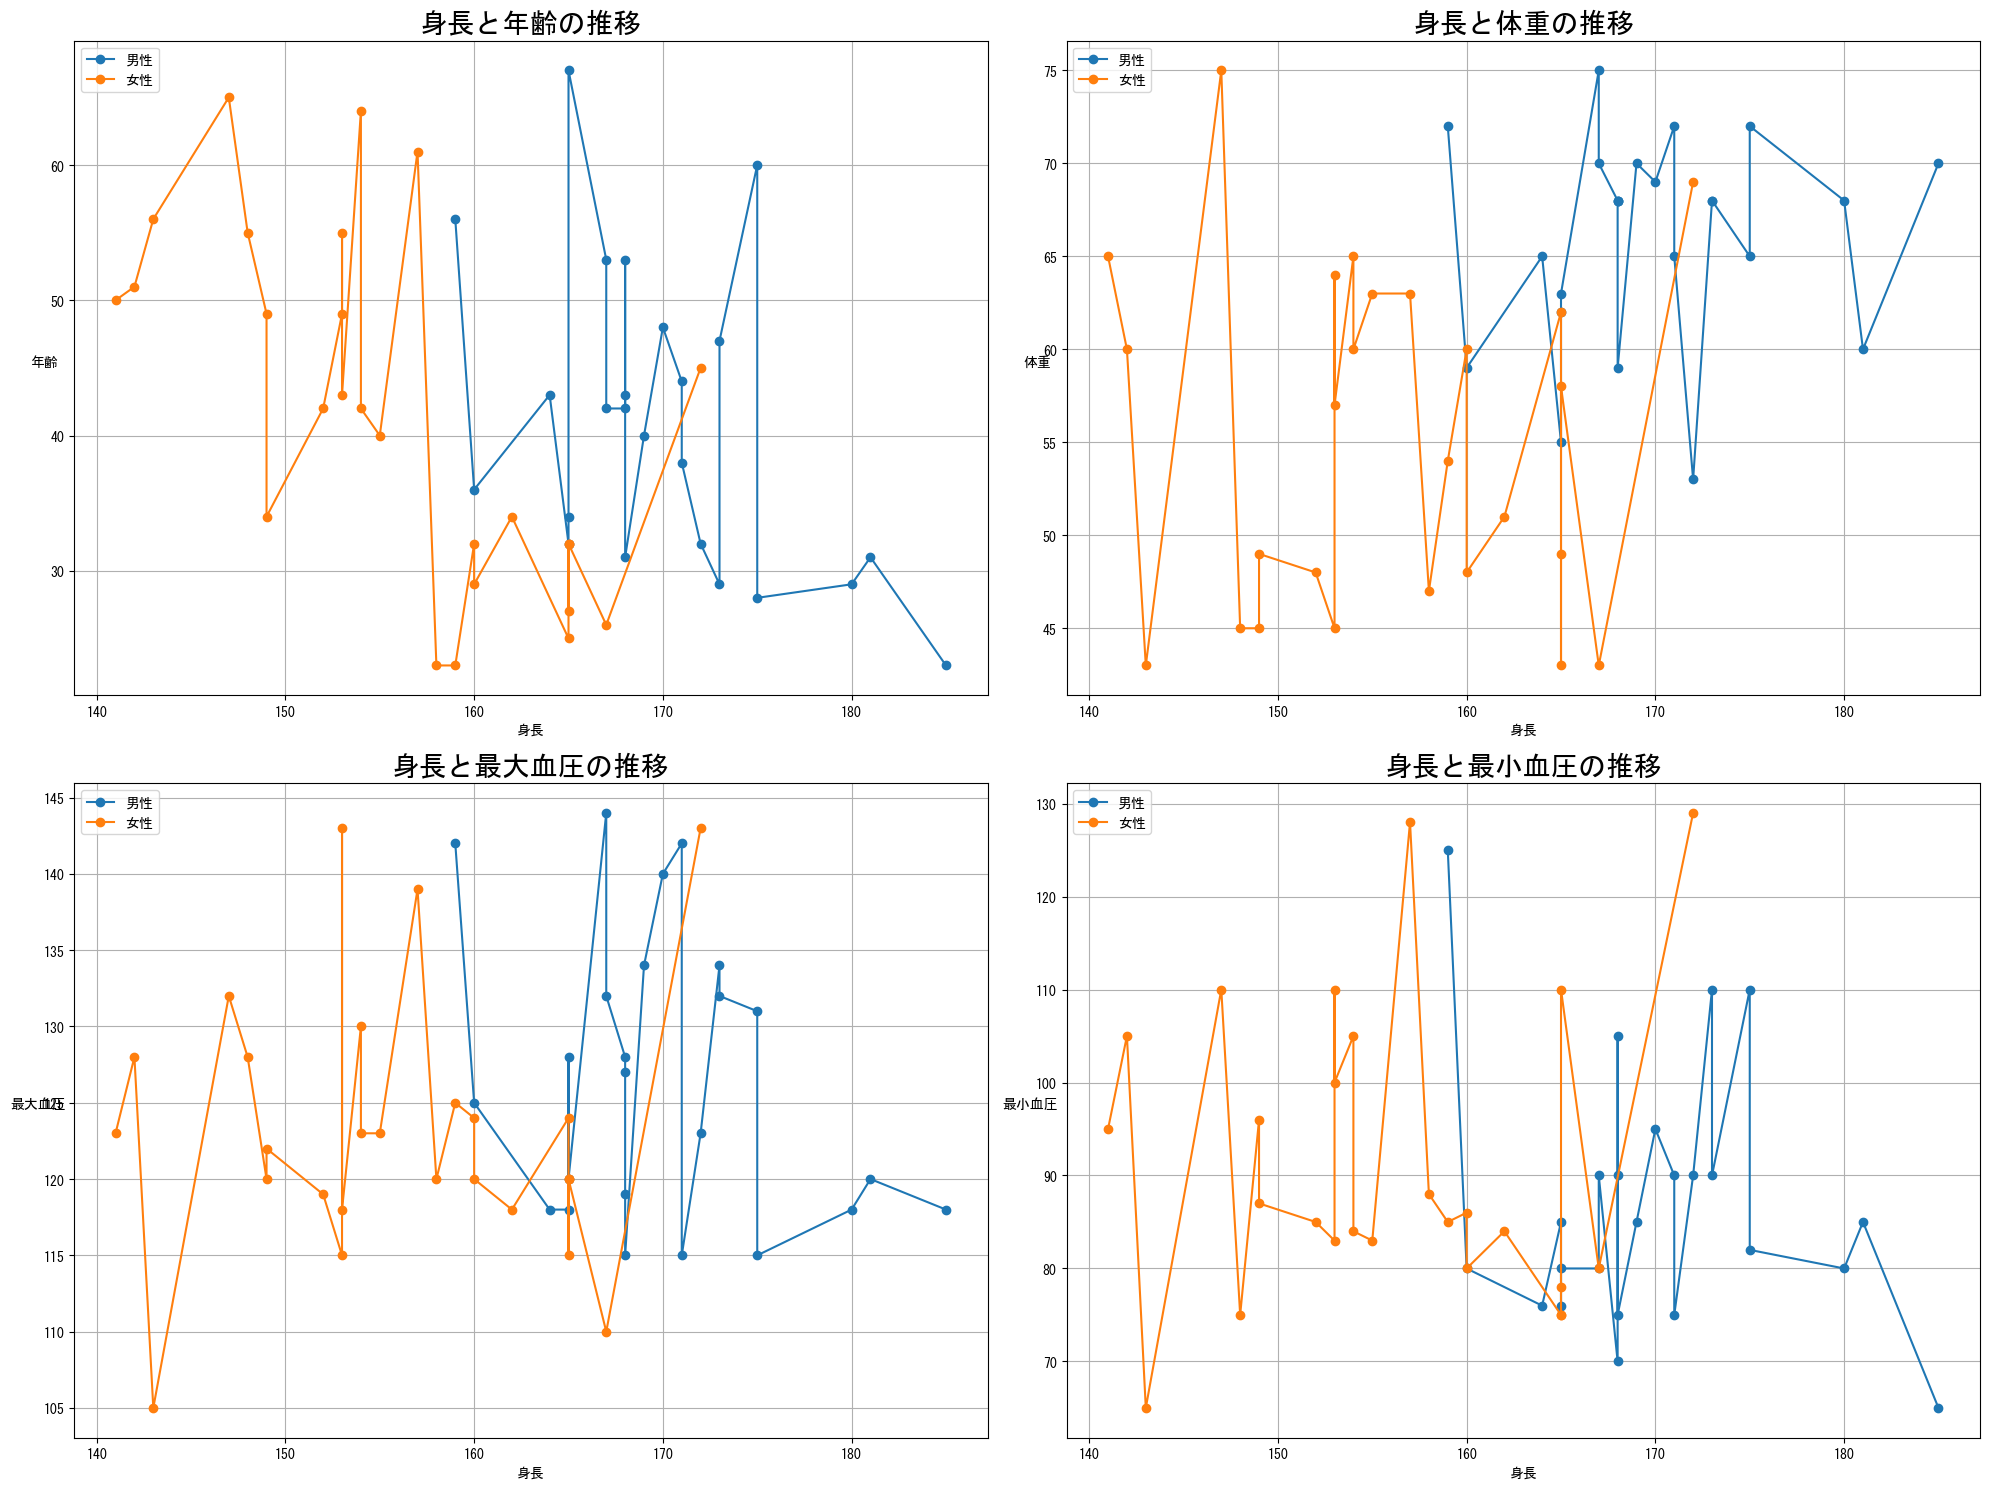

In [ ]:
#身長とそのほかの推移
data_frame.sort_values(by='身長', inplace=True)
male_df.sort_values(by='身長', inplace=True)
female_df.sort_values(by='身長', inplace=True)
plot_transition_splitBy_gender(
    [male_df["身長"], female_df["身長"]],
    [
        [male_df["年齢"], female_df["年齢"]],
        [male_df["体重"], female_df["体重"]],
        [male_df["最大血圧"], female_df["最大血圧"]],
        [male_df["最小血圧"],female_df["最小血圧"]]
    ],
    [
        "身長と年齢の推移",
        "身長と体重の推移",
        "身長と最大血圧の推移",
        "身長と最小血圧の推移"
    ],
    ["男性", "女性"]
)

C:\Users\syu\AppData\Local\Temp\ipykernel_17744\2021059684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df.sort_values(by='最大血圧', inplace=True)
C:\Users\syu\AppData\Local\Temp\ipykernel_17744\2021059684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df.sort_values(by='最大血圧', inplace=True)


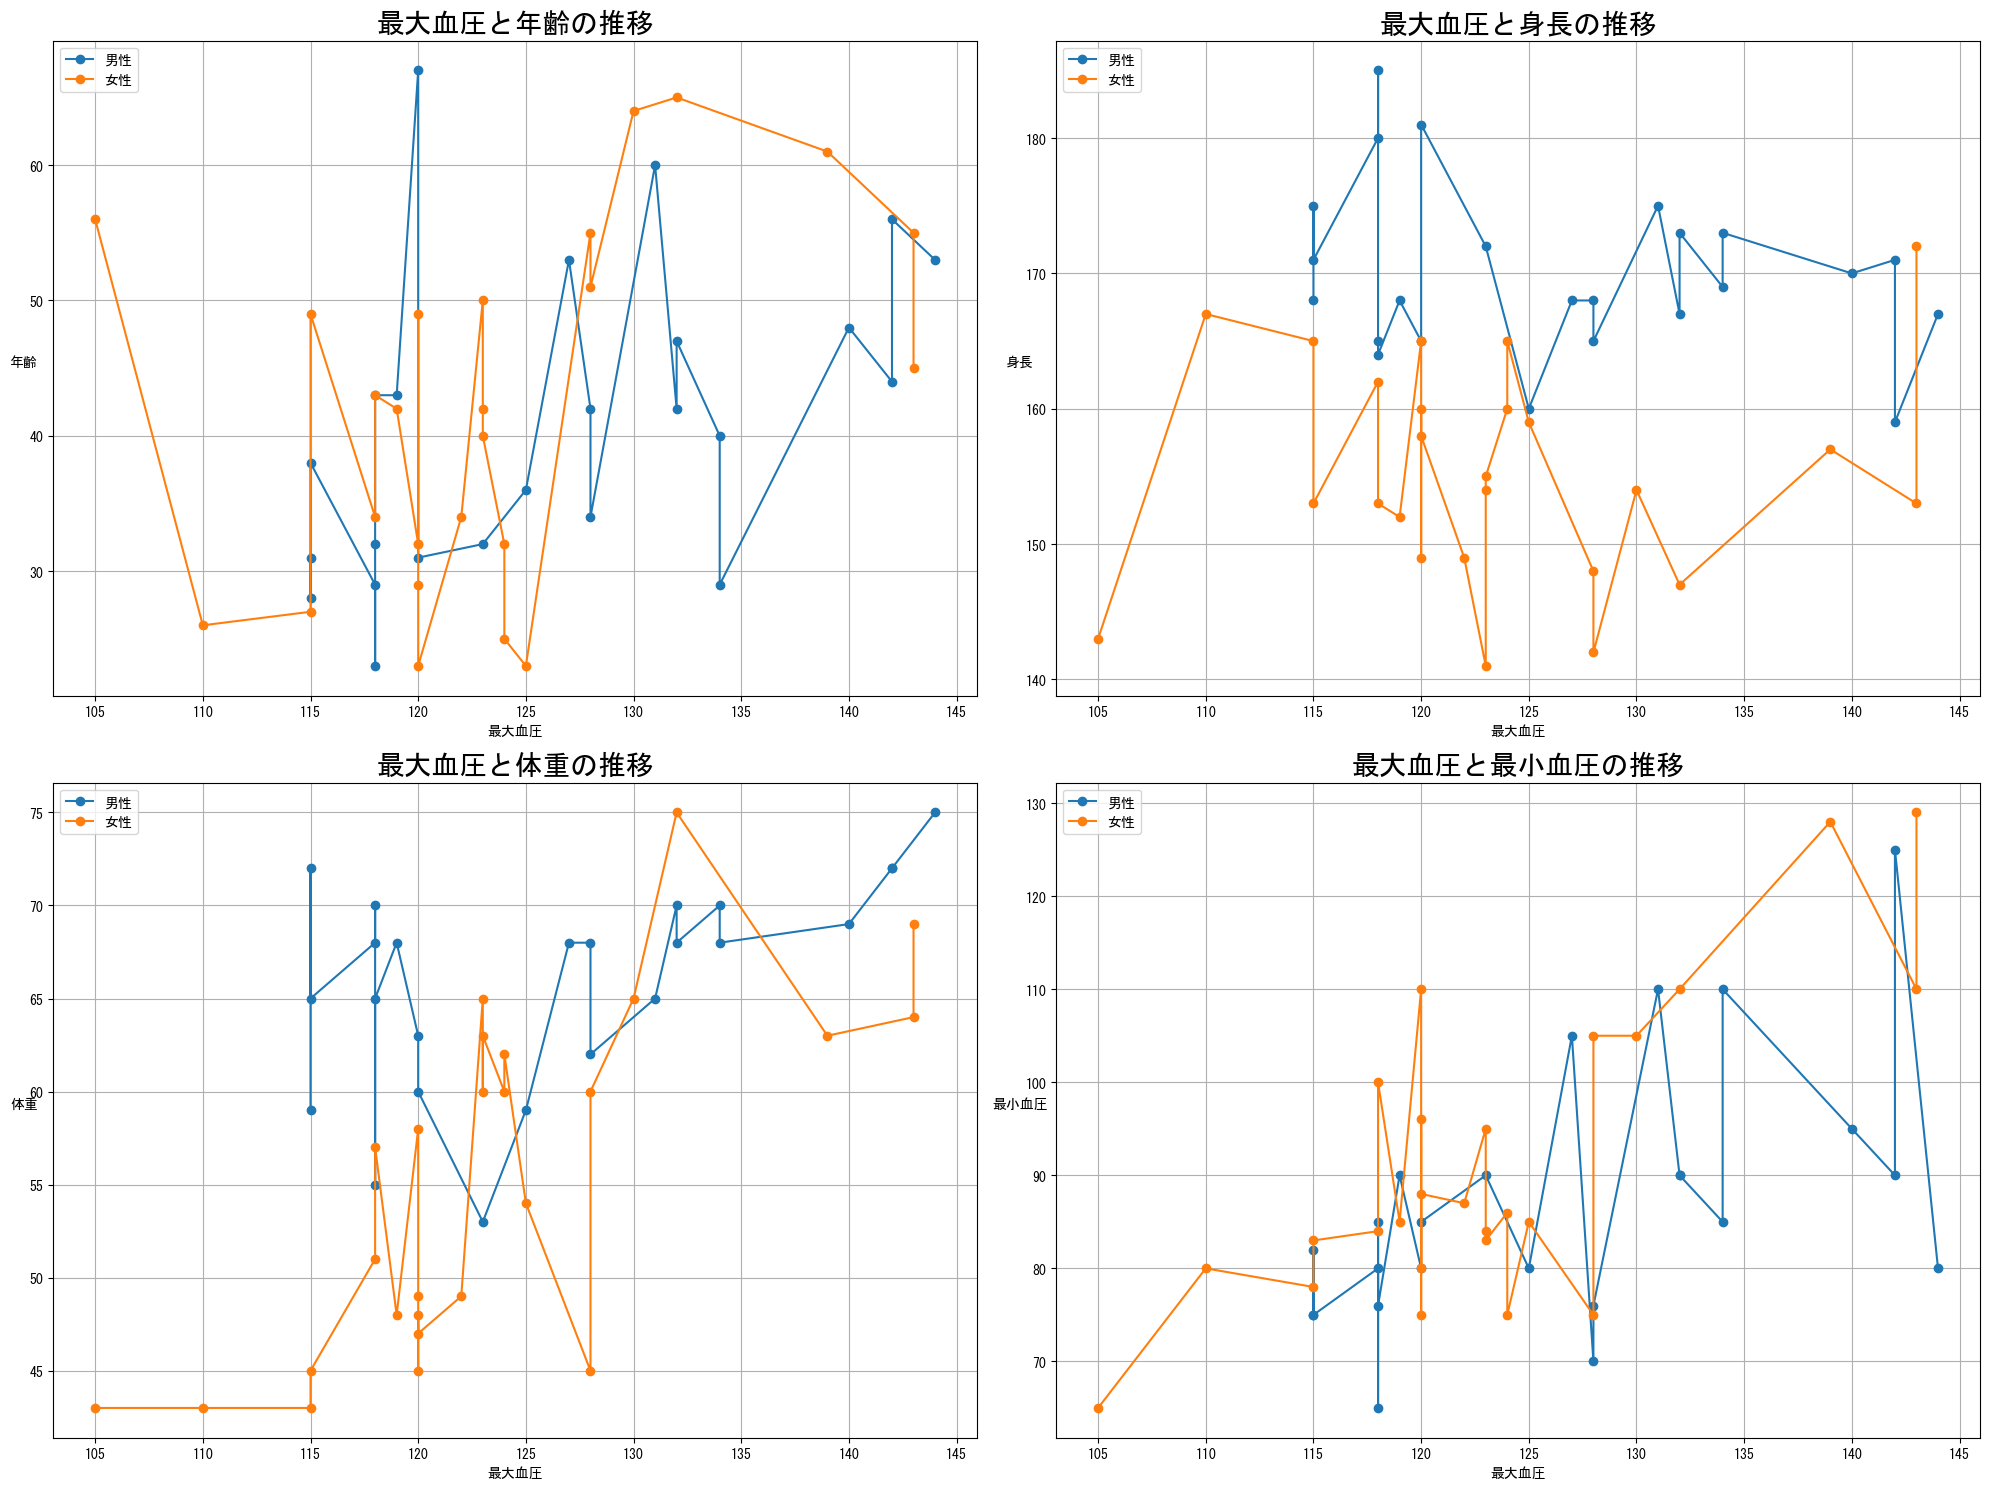

In [ ]:
#最大血圧とそのほかの推移
data_frame.sort_values(by='最大血圧', inplace=True)
male_df.sort_values(by='最大血圧', inplace=True)
female_df.sort_values(by='最大血圧', inplace=True)
plot_transition_splitBy_gender(
    [male_df["最大血圧"], female_df["最大血圧"]],
    [
        [male_df["年齢"], female_df["年齢"]],
        [male_df["身長"], female_df["身長"]],
        [male_df["体重"], female_df["体重"]],
        [male_df["最小血圧"],female_df["最小血圧"]]
    ],
    [
        "最大血圧と年齢の推移",
        "最大血圧と身長の推移",
        "最大血圧と体重の推移",
        "最大血圧と最小血圧の推移"
    ],
    ["男性", "女性"]
)

C:\Users\syu\AppData\Local\Temp\ipykernel_17744\134850892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df.sort_values(by='最小血圧', inplace=True)
C:\Users\syu\AppData\Local\Temp\ipykernel_17744\134850892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df.sort_values(by='最小血圧', inplace=True)


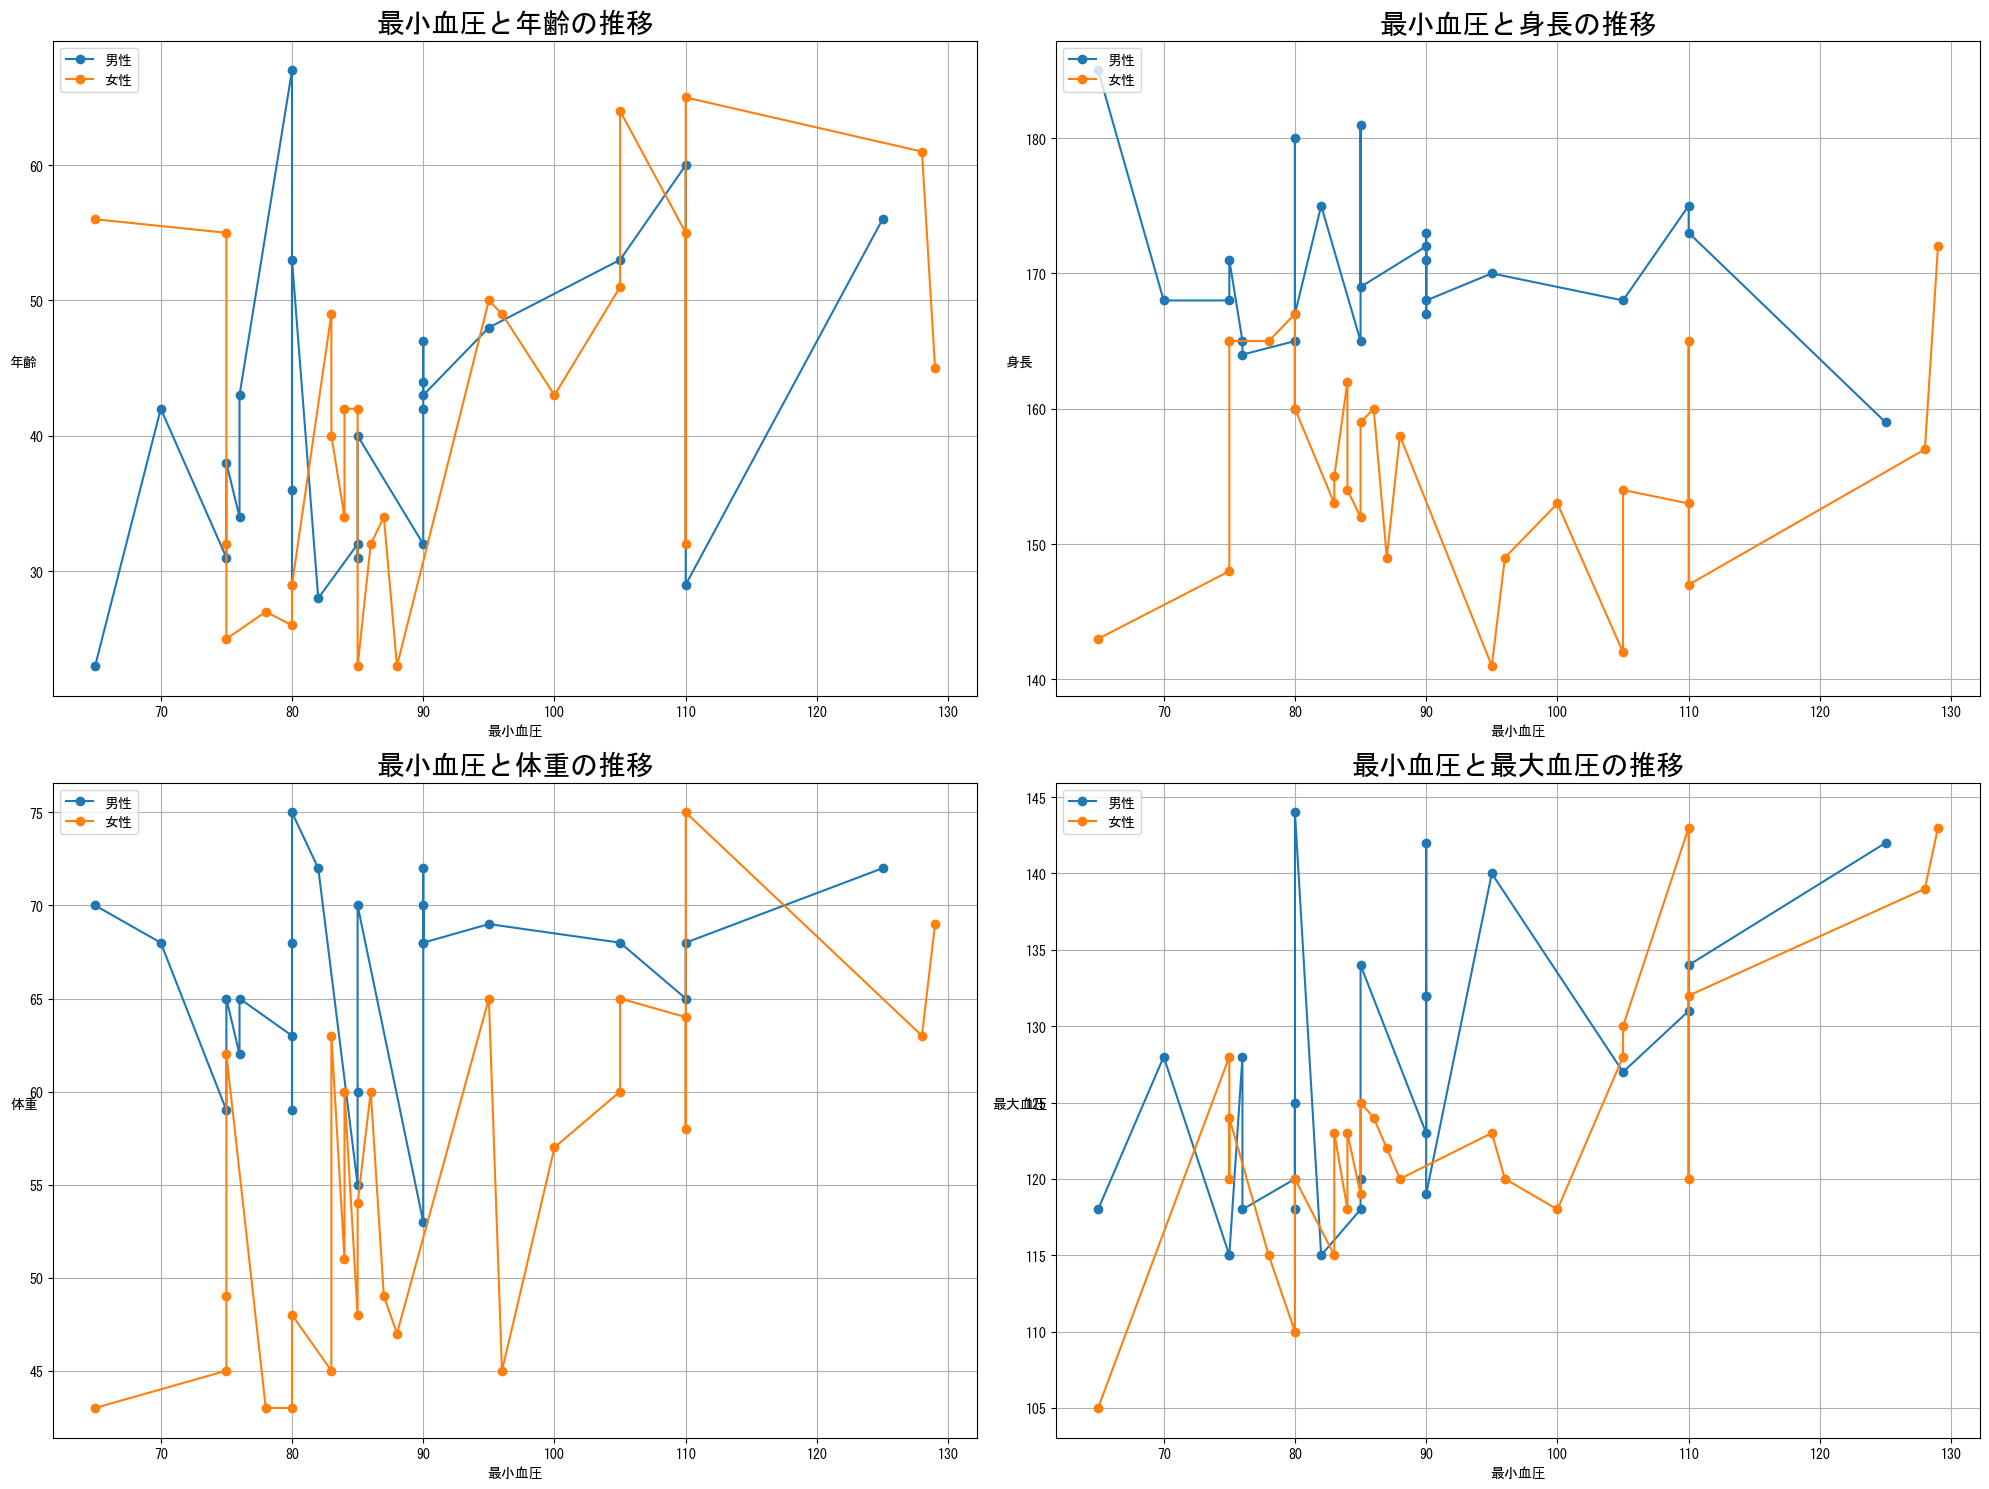

In [ ]:
#最小血圧とそのほかの推移
data_frame.sort_values(by='最小血圧', inplace=True)
male_df.sort_values(by='最小血圧', inplace=True)
female_df.sort_values(by='最小血圧', inplace=True)
plot_transition_splitBy_gender(
    [male_df["最小血圧"], female_df["最小血圧"]],
    [
        [male_df["年齢"], female_df["年齢"]],
        [male_df["身長"], female_df["身長"]],
        [male_df["体重"], female_df["体重"]],
        [male_df["最大血圧"],female_df["最大血圧"]]
    ],
    [
        "最小血圧と年齢の推移",
        "最小血圧と身長の推移",
        "最小血圧と体重の推移",
        "最小血圧と最大血圧の推移"
    ],
    ["男性", "女性"]
)


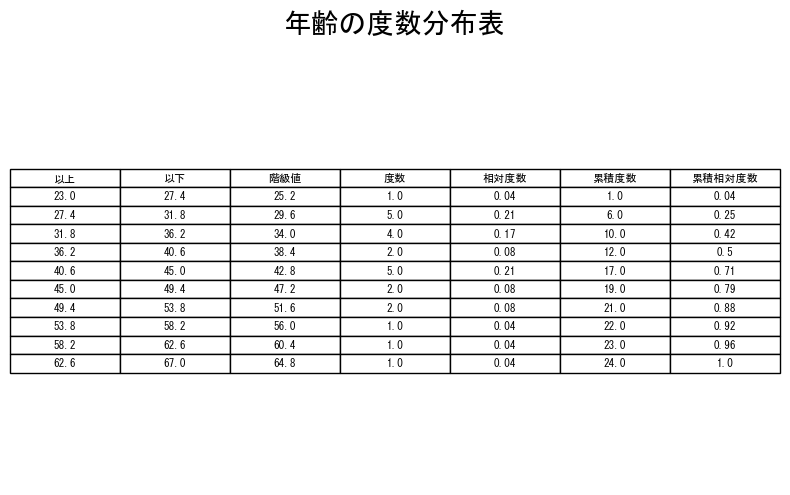

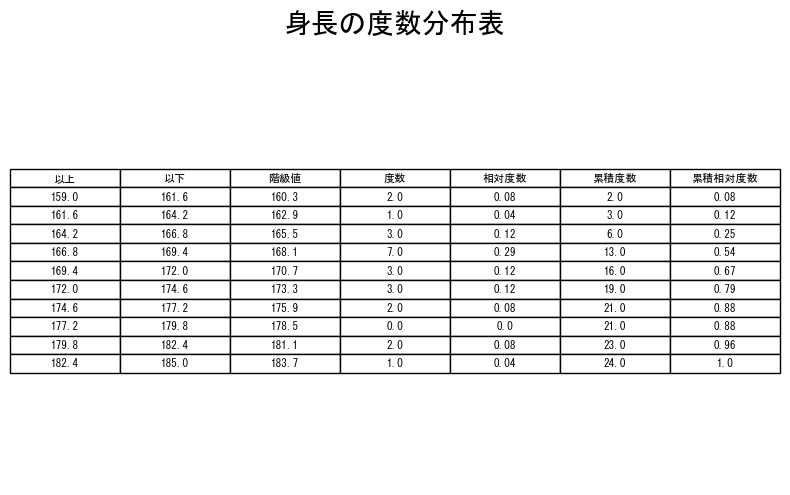

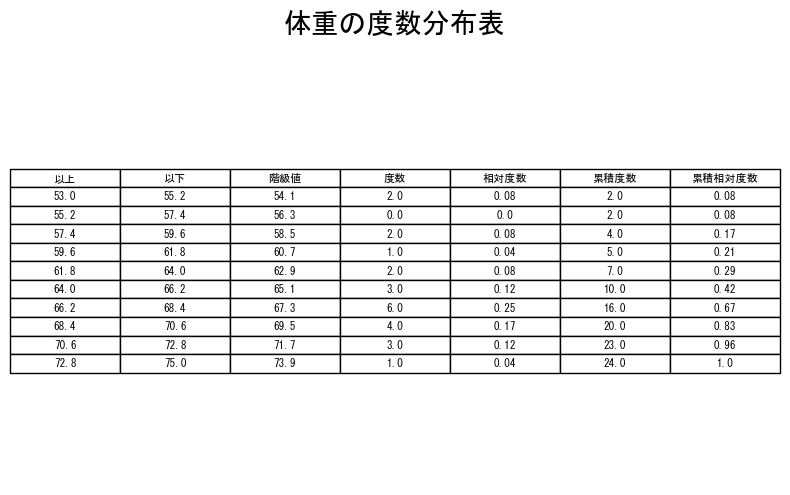

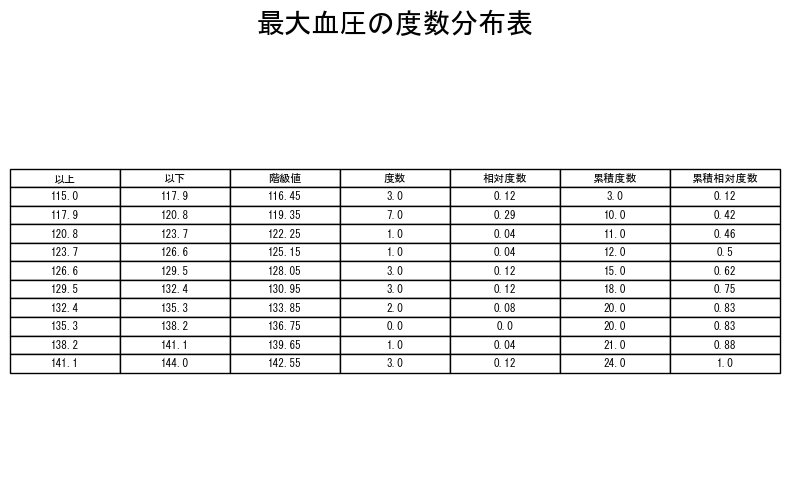

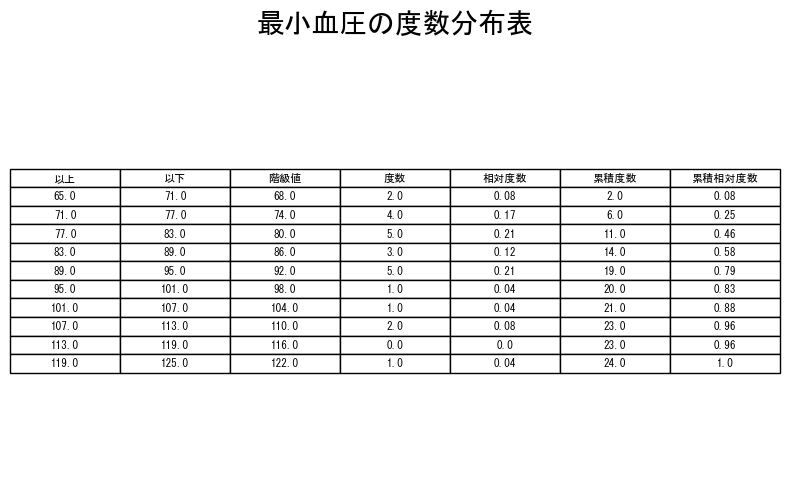

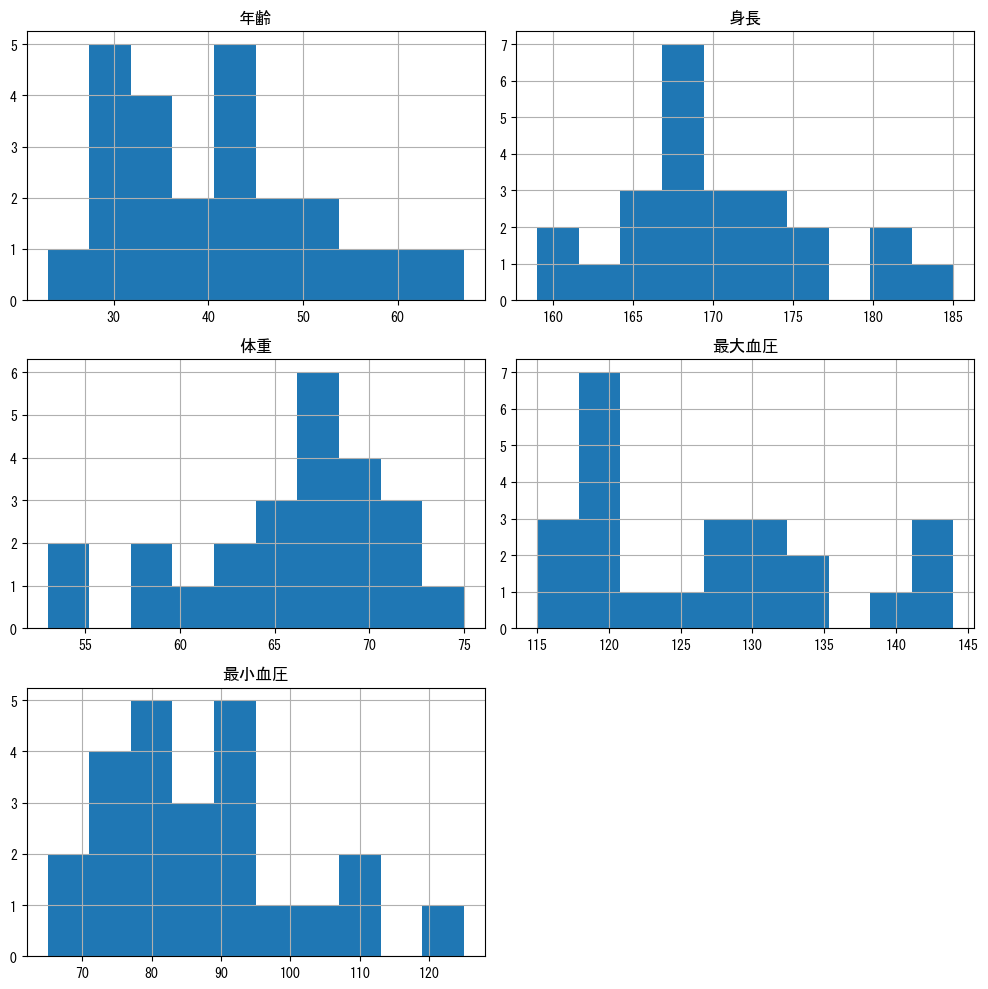

In [ ]:
#男性のみのデータフレームを作成
male_df = data_frame[data_frame['性別'] == 'm']

#男性のみの数値データの度数分布表を表示
show_freq_table(male_df['年齢'], '年齢の度数分布表')
show_freq_table(male_df['身長'], '身長の度数分布表')
show_freq_table(male_df['体重'], '体重の度数分布表')
show_freq_table(male_df['最大血圧'], '最大血圧の度数分布表')
show_freq_table(male_df['最小血圧'], '最小血圧の度数分布表')
male_df.hist(figsize=(10, 10), bins=10)
plt.tight_layout()

array([[<AxesSubplot: title={'center': '年齢'}>,
        <AxesSubplot: title={'center': '身長'}>],
       [<AxesSubplot: title={'center': '体重'}>,
        <AxesSubplot: title={'center': '最大血圧'}>],
       [<AxesSubplot: title={'center': '最小血圧'}>, <AxesSubplot: >]],
      dtype=object)

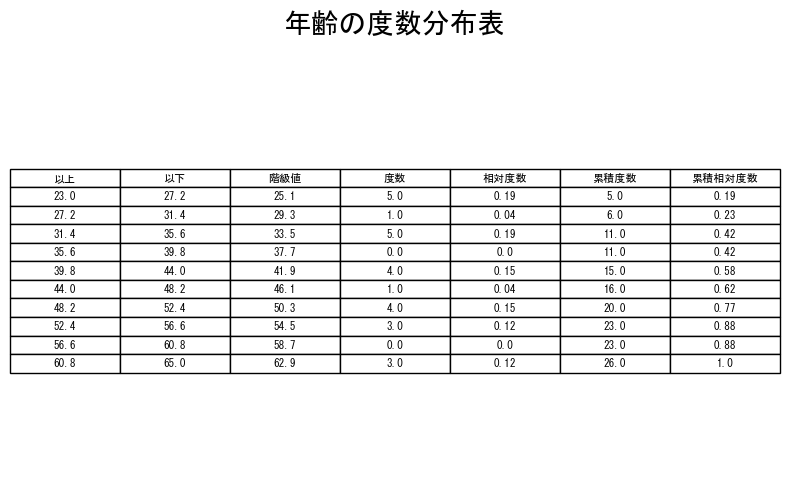

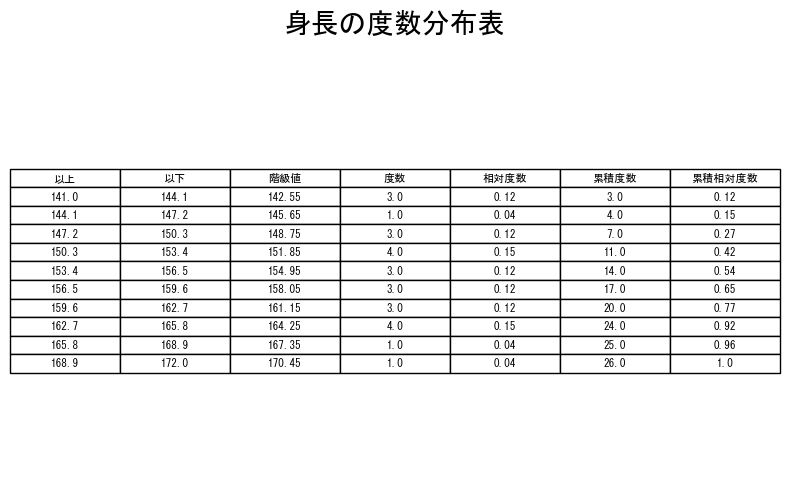

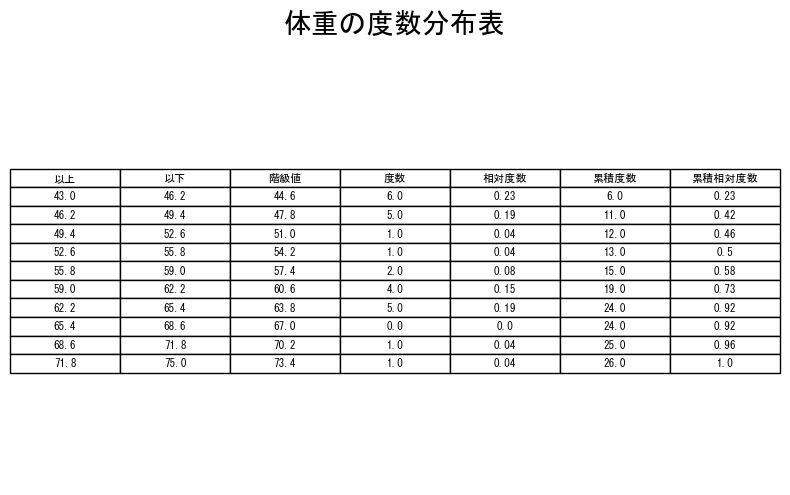

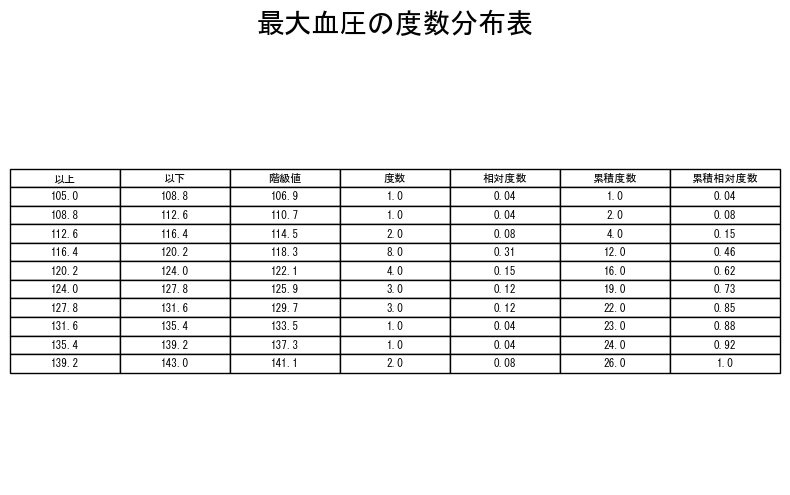

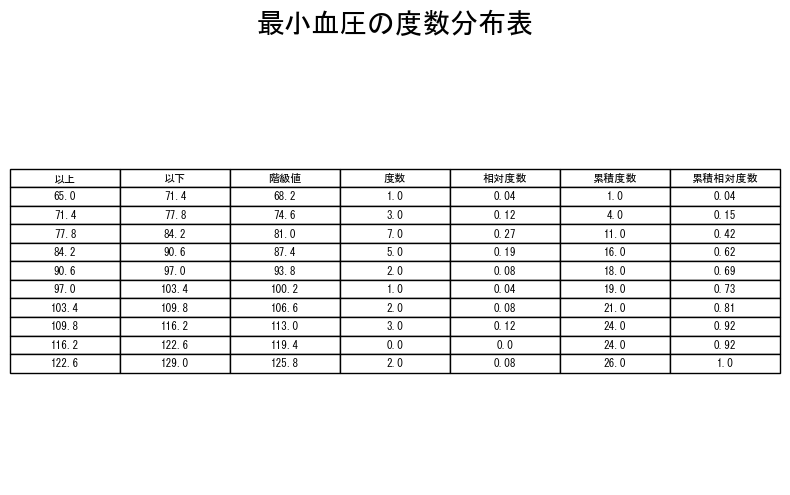

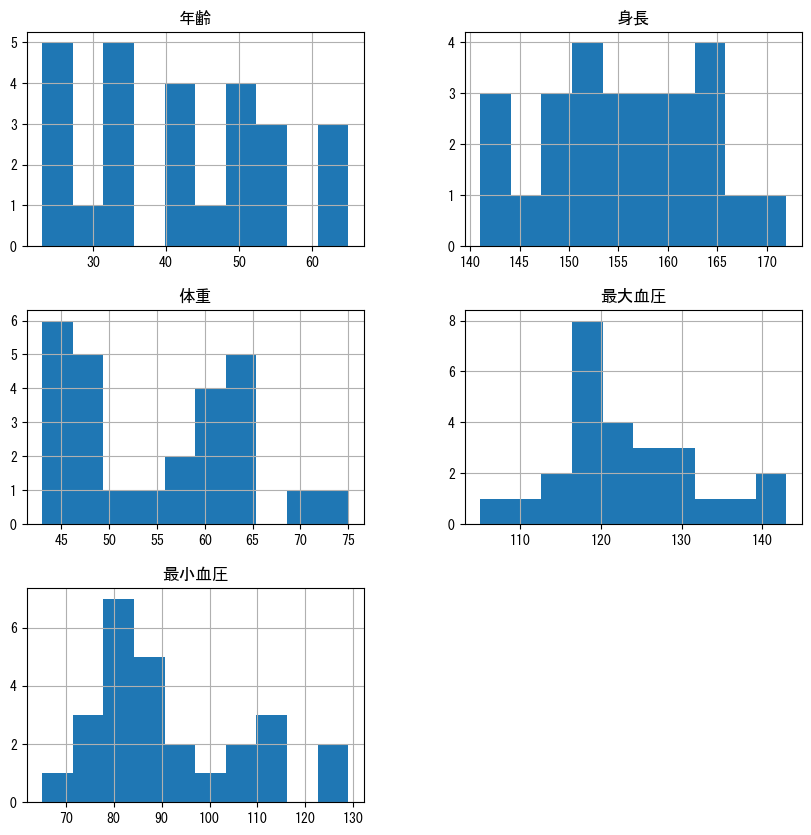

In [ ]:
#女性のみのデータフレームを作成
female_df = data_frame[data_frame['性別'] == 'f']

#女性のみの数値データの度数分布表を表示
show_freq_table(female_df['年齢'], '年齢の度数分布表')
show_freq_table(female_df['身長'], '身長の度数分布表')
show_freq_table(female_df['体重'], '体重の度数分布表')
show_freq_table(female_df['最大血圧'], '最大血圧の度数分布表')
show_freq_table(female_df['最小血圧'], '最小血圧の度数分布表')
female_df.hist(figsize=(10, 10), bins=10)

In [ ]:
#相関比の算出関数
def correlation_ratio(categories:pd.Series, values:pd.Series):
    """_summary_
    量的データと質的データの関連指標である相関比を計算し返却する
    Args:
        np_categories (pd.DataFrame): 比較するカテゴリ1
        np_values (pd.DataFrame): 比較するカテゴリ2

    Returns:
        相関比の値η
    """
    np_categories: np.ndarray = np.array(categories) 
    np_values: np.ndarray = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(np_categories):
        subgroup = np_values[np.where(np_categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(np_values))**2
    return (ssb / (ssb + ssw))**.5


#クラメールの関連係数の算出関数
def cramers_value(x:pd.Series, y:pd.Series):
    """_summary_
    質的データ同士の関連指標である、クラメールの関連係数を計算し返却する
    Args:
        np_categories (pd.DataFrame): 比較するカテゴリ1
        np_values (pd.DataFrame): 比較するカテゴリ2

    Returns:
        クラメールの関連係数の値
    """
    table = np.array(pd.crosstab(x, y)).astype(np.float32)
    n = table.sum()
    colsum = table.sum(axis=0)
    rowsum = table.sum(axis=1)
    expect = np.outer(rowsum, colsum) / n
    chisq = np.sum((table - expect) ** 2 / expect)
    try:
        result = np.sqrt(chisq / (n * (np.min(table.shape) - 1)))
        return result
    except ZeroDivisionError:
        return None

In [ ]:
#全性別の相関比
#年齢と血圧判定
age_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['年齢'])
print("年齢と血圧判定の相関比:η = {}".format(age_bld_prs))
#身長と血圧判定
height_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['身長'])
print("身長と血圧判定の相関比:η = {}".format(height_bld_prs))
#体重と血圧判定
weight_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['体重'])
print("体重と血圧判定の相関比:η = {}".format(weight_bld_prs))
#最大血圧と血圧判定
max_blood_pressure_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['最大血圧'])
print("最大血圧と血圧判定の相関比:η = {}".format(max_blood_pressure_bld_prs))
#最小血圧と血圧判定
min_blood_pressure_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['最小血圧'])
print("最小血圧と血圧判定の相関比:η = {}".format(min_blood_pressure_bld_prs))

#年齢と心電図判定
age_ecg_prs = correlation_ratio(data_frame["心電図判定"],data_frame['年齢'])
print("年齢と心電図判定の相関比:η = {}".format(age_ecg_prs))
#身長と心電図判定
height_ecg_prs = correlation_ratio(data_frame["心電図判定"],data_frame['身長'])
print("身長と心電図判定の相関比:η = {}".format(height_ecg_prs))
#体重と心電図判定
weight_ecg_prs = correlation_ratio(data_frame["心電図判定"],data_frame['体重'])
print("体重と心電図判定の相関比:η = {}".format(weight_ecg_prs))
#最大血圧と心電図判定
max_blood_pressure_ecg_prs = correlation_ratio(data_frame["心電図判定"],data_frame['最大血圧'])
print("最大血圧と心電図判定の相関比:η = {}".format(max_blood_pressure_ecg_prs))
#最小血圧と心電図判定
min_blood_pressure_ecg_prs = correlation_ratio(data_frame["心電図判定"],data_frame['最小血圧'])
print("最小血圧と心電図判定の相関比:η = {}".format(min_blood_pressure_ecg_prs))




年齢と血圧判定の相関比:η = 0.5445804508024876
身長と血圧判定の相関比:η = 0.19677288433399825
体重と血圧判定の相関比:η = 0.5386632715113984
最大血圧と血圧判定の相関比:η = 0.8579220590031839
最小血圧と血圧判定の相関比:η = 0.5542677483328803
年齢と心電図判定の相関比:η = 0.44896125705454903
身長と心電図判定の相関比:η = 0.22979314457185854
体重と心電図判定の相関比:η = 0.564419716027099
最大血圧と心電図判定の相関比:η = 0.7830754639508942
最小血圧と心電図判定の相関比:η = 0.6605277694311484


In [ ]:
#男性の相関比
#年齢と血圧判定
male_age_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['年齢'])
print("年齢と血圧判定の相関比:η = {}".format(male_age_bld_prs))
#身長と血圧判定
male_height_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['身長'])
print("身長と血圧判定の相関比:η = {}".format(male_height_bld_prs))
#体重と血圧判定
male_weight_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['体重'])
print("体重と血圧判定の相関比:η = {}".format(male_weight_bld_prs))
#最大血圧と血圧判定
male_max_blood_pressure_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['最大血圧'])
print("最大血圧と血圧判定の相関比:η = {}".format(male_max_blood_pressure_bld_prs))
#最小血圧と血圧判定
male_min_blood_pressure_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['最小血圧'])
print("最小血圧と血圧判定の相関比:η = {}".format(male_min_blood_pressure_bld_prs))

#年齢と心電図判定
male_age_ecg_prs = correlation_ratio(male_df["心電図判定"],male_df['年齢'])
print("年齢と心電図判定の相関比:η = {}".format(male_age_ecg_prs))
#身長と心電図判定
male_height_ecg_prs = correlation_ratio(male_df["心電図判定"],male_df['身長'])
print("身長と心電図判定の相関比:η = {}".format(male_height_ecg_prs))
#体重と心電図判定
male_weight_ecg_prs = correlation_ratio(male_df["心電図判定"],male_df['体重'])
print("体重と心電図判定の相関比:η = {}".format(male_weight_ecg_prs))
#最大血圧と心電図判定
male_max_blood_pressure_ecg_prs = correlation_ratio(male_df["心電図判定"],male_df['最大血圧'])
print("最大血圧と心電図判定の相関比:η = {}".format(male_max_blood_pressure_ecg_prs))
#最小血圧と心電図判定
male_min_blood_pressure_ecg_prs = correlation_ratio(male_df["心電図判定"],male_df['最小血圧'])
print("最小血圧と心電図判定の相関比:η = {}".format(male_min_blood_pressure_ecg_prs))


年齢と血圧判定の相関比:η = 0.47918583898374206
身長と血圧判定の相関比:η = 0.37384041915468696
体重と血圧判定の相関比:η = 0.6324398893903872
最大血圧と血圧判定の相関比:η = 0.8650269650837211
最小血圧と血圧判定の相関比:η = 0.6386525083886393
年齢と心電図判定の相関比:η = 0.33381454103208685
身長と心電図判定の相関比:η = 0.14320362995597202
体重と心電図判定の相関比:η = 0.5383245389018514
最大血圧と心電図判定の相関比:η = 0.7889731461741352
最小血圧と心電図判定の相関比:η = 0.6086318144715804


In [ ]:
#女性の相関比
#年齢と血圧判定
female_age_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['年齢'])
print("年齢と血圧判定の相関比:η = {}".format(female_age_bld_prs))
#身長と血圧判定
female_height_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['身長'])
print("身長と血圧判定の相関比:η = {}".format(female_height_bld_prs))
#体重と血圧判定
female_weight_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['体重'])
print("体重と血圧判定の相関比:η = {}".format(female_weight_bld_prs))
#最大血圧と血圧判定
female_max_blood_pressure_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['最大血圧'])
print("最大血圧と血圧判定の相関比:η = {}".format(female_max_blood_pressure_bld_prs))
#最小血圧と血圧判定
female_min_blood_pressure_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['最小血圧'])
print("最小血圧と血圧判定の相関比:η = {}".format(female_min_blood_pressure_bld_prs))


#年齢と心電図判定
female_age_ecg_prs = correlation_ratio(female_df["心電図判定"],female_df['年齢'])
print("年齢と心電図判定の相関比:η = {}".format(female_age_ecg_prs))
#身長と心電図判定
female_height_ecg_prs = correlation_ratio(female_df["心電図判定"],female_df['身長'])
print("身長と心電図判定の相関比:η = {}".format(female_height_ecg_prs))
#体重と心電図判定
female_weight_ecg_prs = correlation_ratio(female_df["心電図判定"],female_df['体重'])
print("体重と心電図判定の相関比:η = {}".format(female_weight_ecg_prs))
#最大血圧と心電図判定
female_max_blood_pressure_ecg_prs = correlation_ratio(female_df["心電図判定"],female_df['最大血圧'])
print("最大血圧と心電図判定の相関比:η = {}".format(female_max_blood_pressure_ecg_prs))
#最小血圧と心電図判定
female_min_blood_pressure_ecg_prs = correlation_ratio(female_df["心電図判定"],female_df['最小血圧'])
print("最小血圧と心電図判定の相関比:η = {}".format(female_min_blood_pressure_ecg_prs))



年齢と血圧判定の相関比:η = 0.6926816820669719
身長と血圧判定の相関比:η = 0.40398459521924435
体重と血圧判定の相関比:η = 0.5230253140469021
最大血圧と血圧判定の相関比:η = 0.8495219652760218
最小血圧と血圧判定の相関比:η = 0.750709779922689
年齢と心電図判定の相関比:η = 0.6283462978484892
身長と心電図判定の相関比:η = 0.05694534248116728
体重と心電図判定の相関比:η = 0.6804814379691682
最大血圧と心電図判定の相関比:η = 0.7968650173877229
最小血圧と心電図判定の相関比:η = 0.8445633709253606


心電図判定   A  B  C  D
血圧判定              
A      28  5  1  0
B       1  1  5  0
C       0  0  1  5
D       0  0  2  1


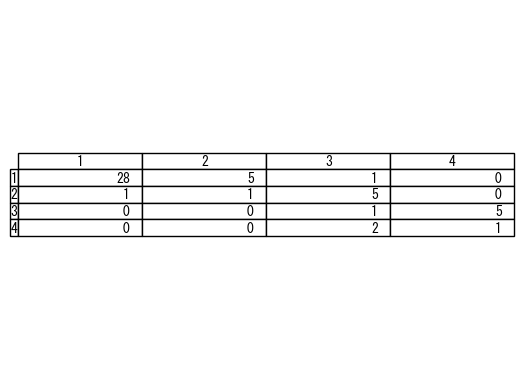

血圧判定と心電図判定のクラメールの関連係数:V = 0.6488904628705541


In [ ]:
#全性別のクラメールの関連係数

#血圧判定と心電図判定のクロス集計
cross_table = pd.crosstab(data_frame["血圧判定"],data_frame["心電図判定"])
print(cross_table)
plt.axis("off")
plt.table(cellText=cross_table.values,rowLabels=["1", "2", "3", "4"], colLabels=["1", "2", "3", "4"], loc='center')
plt.xlabel("心電図判定")
plt.ylabel("血圧判定")
plt.show()
#血圧判定と心電図判定のクラメールの関連係数
bld_ecg_cramer = cramers_value(data_frame["血圧判定"],data_frame["心電図判定"])
print("血圧判定と心電図判定のクラメールの関連係数:V = {}".format(bld_ecg_cramer))


In [ ]:
#男性のクラメールの関連係数
#クロス集計
male_cross_table = pd.crosstab(male_df["血圧判定"], male_df["心電図判定"])
print(male_cross_table)
#血圧判定と心電図判定のクラメールの関連係数
male_bld_ecg_cramer = cramers_value(male_df["血圧判定"], male_df["心電図判定"])
print("男性の血圧判定と心電図判定のクラメールの関連係数:V = {}".format(male_bld_ecg_cramer))

#女性のクラメールの関連係数
#クロス集計
female_cross_table = pd.crosstab(female_df["血圧判定"], female_df["心電図判定"])
print(female_cross_table)
#血圧判定と心電図判定のクラメールの関連係数
female_bld_ecg_cramer= cramers_value(female_df["血圧判定"], female_df["心電図判定"])
print("女性の血圧判定と心電図判定のクラメールの関連係数:V = {}".format(female_bld_ecg_cramer))

心電図判定   A  B  C  D
血圧判定              
A      13  0  1  0
B       0  1  3  0
C       0  0  0  4
D       0  0  1  1
男性の血圧判定と心電図判定のクラメールの関連係数:V = 0.7400128903569334
心電図判定   A  B  C  D
血圧判定              
A      15  5  0  0
B       1  0  2  0
C       0  0  1  1
D       0  0  1  0
女性の血圧判定と心電図判定のクラメールの関連係数:V = 0.6277716192375195
